# WeatherPy
----

### Analysis
* The data indicates that temperatures tend to be higher nearer the Equator, which is in line with historic scientific research indicating an inverse relationship between Temperature and Latitude.


* There seems to be a slight inverse relationship between Windspeed and Temperature, where higher temperatures measurements tend to be associated with lower windspeed measurements. 


* A similar slight inverse relationship can also been seen between Windspeed and Humidity, where higher humidity measurements tend to be associated with lower windspeed measurements.


* There also seems to be a weak relationship between Temperature and Humidity, where higher tempetures are associated with higher humidity levels.


* There does not seem to be a strong relationship between any of the following: latitude and cloudiness; latitude and windspeed; latitude and humidity; temperature and cloudiness; cloudiness and windspeed; and cloudiness and humidity.


* Because the data set includes only a single snapshot of weather measurements from each location, it is impossible to determine if the data indicate trends, or if the data represents normal weather. An analysis of data that includes the same measurements from the same locations during a longer period of time would allow a better understanding of trends and to determine the normality of the current data. Because the data set is comprised of a random selection of cities, it is possible that some areas of the globe are not fully represented – and some areas are over-represented. The use of a data set that is truly representative of all global locations would allow for better analysis.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from pandas import read_csv

# API key
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_data = pd.DataFrame({"City":cities}) 
cities_data = cities_data.drop_duplicates('City')
cities_data.head()

,City
0,margate
1,taybad
2,albany
3,hobart
4,kupang


In [3]:
print(cities)

['margate', 'taybad', 'albany', 'hobart', 'kupang', 'touros', 'qaanaaq', 'nizhneyansk', 'kendari', 'busselton', 'esperance', 'rikitea', 'coquimbo', 'ushuaia', 'luderitz', 'lebu', 'hermanus', 'anadyr', 'hilo', 'mataura', 'port lincoln', 'kavieng', 'faanui', 'arraial do cabo', 'east london', 'mar del plata', 'sobolevo', 'cherskiy', 'belushya guba', 'dryden', 'pangnirtung', 'ariquemes', 'san cristobal', 'garowe', 'kisangani', 'thompson', 'makakilo city', 'vaini', 'cape town', 'punta arenas', 'mys shmidta', 'mahebourg', 'kapaa', 'north bend', 'lagoa', 'samusu', 'hofn', 'geraldton', 'cap malheureux', 'dakar', 'mao', 'nanortalik', 'khash', 'barentsburg', 'plettenberg bay', 'taolanaro', 'iqaluit', 'chokurdakh', 'alofi', 'havre', 'mirnyy', 'bluff', 'fort nelson', 'cockburn town', 'sentyabrskiy', 'marsh harbour', 'mogadishu', 'port alfred', 'nanded', 'bilibino', 'norman wells', 'tir pol', 'provideniya', 'clyde river', 'ayagoz', 'itoman', 'omboue', 'lagoa da prata', 'portland', 'guerrero negro',

In [4]:
# Create DF columns
cities_data["Latitude"] = ""
cities_data["Longitude"] = ""
cities_data["Date"] = ""
cities_data["Temperature"] = ""
cities_data["Humidity"] = ""
cities_data["Cloudiness"] = ""
cities_data["Windspeed"] = ""

cities_data.head()

,City,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Windspeed
0,margate,,,,,,,
1,taybad,,,,,,,
2,albany,,,,,,,
3,hobart,,,,,,,
4,kupang,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
appid=api_key

# Set the initial row count to zero
row_count = 0

print("-------------------------")
print("Begin City Data Retrieval")
print("-------------------------")

# Loop through the cities and perform API Calls
for index, row in cities_data.iterrows():
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=imperial&appid=%s" %(row["City"], api_key)
    
    response = requests.get(target_url).json()
    print("Retrieving city #%s: %s" % (row_count + 1, cities_data.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_data.set_value(index, "Latitude", response["coord"]["lat"])
        cities_data.set_value(index, "Longitude", response["coord"]["lon"])
        cities_data.set_value(index, "Date", response["dt"])
        cities_data.set_value(index, "Humidity", response["main"]["humidity"])
        cities_data.set_value(index, "Temperature", response["main"]["temp_max"])
        cities_data.set_value(index, "Windspeed", response["wind"]["speed"])
        cities_data.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("City Not Found... Skipping.")
        
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

time.sleep(1.1)


-------------------------
Begin City Data Retrieval
-------------------------
Retrieving city #1: margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb


C:\Users\sstev\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sstev\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sstev\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sstev\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\sstev\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future rele

Retrieving city #2: taybad
http://api.openweathermap.org/data/2.5/weather?q=taybad&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #3: albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #4: hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #5: kupang
http://api.openweathermap.org/data/2.5/weather?q=kupang&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #6: touros
http://api.openweathermap.org/data/2.5/weather?q=touros&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #7: qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #8: nizhneyansk
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
R

Retrieving city #59: alofi
http://api.openweathermap.org/data/2.5/weather?q=alofi&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #60: havre
http://api.openweathermap.org/data/2.5/weather?q=havre&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #61: mirnyy
http://api.openweathermap.org/data/2.5/weather?q=mirnyy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #62: bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #63: fort nelson
http://api.openweathermap.org/data/2.5/weather?q=fort nelson&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #64: cockburn town
http://api.openweathermap.org/data/2.5/weather?q=cockburn town&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #65: sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City

Retrieving city #116: hereford
http://api.openweathermap.org/data/2.5/weather?q=hereford&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #117: bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #118: goderich
http://api.openweathermap.org/data/2.5/weather?q=goderich&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #119: sorong
http://api.openweathermap.org/data/2.5/weather?q=sorong&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #120: nikolskoye
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #121: aklavik
http://api.openweathermap.org/data/2.5/weather?q=aklavik&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #122: adrar
http://api.openweathermap.org/data/2.5/weather?q=adrar&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving 

Retrieving city #172: tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
Retrieving city #173: sampit
http://api.openweathermap.org/data/2.5/weather?q=sampit&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #174: haibowan
http://api.openweathermap.org/data/2.5/weather?q=haibowan&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
Retrieving city #175: marcona
http://api.openweathermap.org/data/2.5/weather?q=marcona&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
Retrieving city #176: hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #177: neryungri
http://api.openweathermap.org/data/2.5/weather?q=neryungri&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #178: katsuura
http://api.openweathermap.org/data/

Retrieving city #228: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #229: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #230: labuhan
http://api.openweathermap.org/data/2.5/weather?q=labuhan&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #231: airai
http://api.openweathermap.org/data/2.5/weather?q=airai&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #232: lompoc
http://api.openweathermap.org/data/2.5/weather?q=lompoc&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #233: saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #234: vostok
http://api.openweathermap.org/data/2.5/weather?q=vostok&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb

Retrieving city #285: ancud
http://api.openweathermap.org/data/2.5/weather?q=ancud&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #286: rio gallegos
http://api.openweathermap.org/data/2.5/weather?q=rio gallegos&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #287: wazzan
http://api.openweathermap.org/data/2.5/weather?q=wazzan&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
Retrieving city #288: bathsheba
http://api.openweathermap.org/data/2.5/weather?q=bathsheba&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #289: ozieri
http://api.openweathermap.org/data/2.5/weather?q=ozieri&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #290: arbazh
http://api.openweathermap.org/data/2.5/weather?q=arbazh&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #291: djibo
http://api.openweathermap.org/data/2.5/weather?q=djibo&units=imperial&appid=25bc90a1196e6f153e

Retrieving city #341: kroya
http://api.openweathermap.org/data/2.5/weather?q=kroya&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #342: kurayoshi
http://api.openweathermap.org/data/2.5/weather?q=kurayoshi&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #343: mount isa
http://api.openweathermap.org/data/2.5/weather?q=mount isa&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #344: komsomolskiy
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #345: gao
http://api.openweathermap.org/data/2.5/weather?q=gao&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #346: caravelas
http://api.openweathermap.org/data/2.5/weather?q=caravelas&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #347: wanning
http://api.openweathermap.org/data/2.5/weather?q=wanning&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Ret

Retrieving city #398: noumea
http://api.openweathermap.org/data/2.5/weather?q=noumea&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #399: belle fourche
http://api.openweathermap.org/data/2.5/weather?q=belle fourche&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #400: barra do garcas
http://api.openweathermap.org/data/2.5/weather?q=barra do garcas&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #401: san pedro
http://api.openweathermap.org/data/2.5/weather?q=san pedro&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #402: gweta
http://api.openweathermap.org/data/2.5/weather?q=gweta&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #403: krasnoyarsk-45
http://api.openweathermap.org/data/2.5/weather?q=krasnoyarsk-45&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
Retrieving city #404: osakarovka
http://api.openweathermap.org/data/2.5/weather?q=osak

Retrieving city #454: grindavik
http://api.openweathermap.org/data/2.5/weather?q=grindavik&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #455: vondrozo
http://api.openweathermap.org/data/2.5/weather?q=vondrozo&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #456: boljevac
http://api.openweathermap.org/data/2.5/weather?q=boljevac&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #457: nanakuli
http://api.openweathermap.org/data/2.5/weather?q=nanakuli&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #458: lasa
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #459: murdochville
http://api.openweathermap.org/data/2.5/weather?q=murdochville&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #460: inirida
http://api.openweathermap.org/data/2.5/weather?q=inirida&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb

Retrieving city #511: kletskaya
http://api.openweathermap.org/data/2.5/weather?q=kletskaya&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #512: magadan
http://api.openweathermap.org/data/2.5/weather?q=magadan&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #513: peleduy
http://api.openweathermap.org/data/2.5/weather?q=peleduy&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #514: kokopo
http://api.openweathermap.org/data/2.5/weather?q=kokopo&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #515: asyut
http://api.openweathermap.org/data/2.5/weather?q=asyut&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #516: catuday
http://api.openweathermap.org/data/2.5/weather?q=catuday&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #517: port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrievin

Retrieving city #568: saint anthony
http://api.openweathermap.org/data/2.5/weather?q=saint anthony&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #569: karamay
http://api.openweathermap.org/data/2.5/weather?q=karamay&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
City Not Found... Skipping.
Retrieving city #570: nordhausen
http://api.openweathermap.org/data/2.5/weather?q=nordhausen&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #571: mzimba
http://api.openweathermap.org/data/2.5/weather?q=mzimba&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #572: abu dhabi
http://api.openweathermap.org/data/2.5/weather?q=abu dhabi&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #573: mosquera
http://api.openweathermap.org/data/2.5/weather?q=mosquera&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving city #574: ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?q=ust-kamchatsk&units

In [6]:
cities_data.head()

,City,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Windspeed
0,margate,-43.03,147.26,1541278800,55.4,58,75,10.29
1,taybad,34.74,60.78,1541281160,19.22,82,0,3.6
2,albany,42.65,-73.75,1541278440,46.94,53,40,20.8
3,hobart,-42.88,147.33,1541278800,55.4,58,75,10.29
4,kupang,-10.16,123.6,1541281161,80.2,94,0,10.09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#cities_data.to_csv

export_csv = cities_data.to_csv (r'C:\Users\sstev\Documents\WASHSTL201809DATA3\06-Python-APIs\Homework\Instructions\starter_code\Cities_data.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [8]:
#cities_data = pd.read_csv("cities_data.csv")

cities_data = pd.read_csv("cities_data.csv", header=None)
cities_data[[1,2,3,5,6,7]] = cities_data[[1,2,3,5,6,7]].replace(0)
cities_data.dropna(inplace=True)

new_header = cities_data.iloc[0] #grab the first row for the header
cities_data = cities_data[1:] #take the data less the header row
cities_data.columns = new_header 

print(cities_data.shape)
print(cities_data.describe())


(558, 8)
0       City Latitude Longitude        Date Temperature Humidity Cloudiness  \
count    558      558       558         558         558      558        558   
unique   558      544       553         216         330       81         22   
top     lasa     4.71     81.12  1541278800          77      100          0   
freq       1        2         2         142          14       91        121   

0      Windspeed  
count        558  
unique       199  
top          4.7  
freq          24  


In [9]:
# Convert Date to DateTime  
cities_data["Date"] = pd.to_datetime(cities_data["Date"], unit='s')


In [10]:
cities_data.head()

,City,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Windspeed
1,margate,-43.03,147.26,2018-11-03 21:00:00,55.4,58,75,10.29
2,taybad,34.74,60.78,2018-11-03 21:39:20,19.22,82,0,3.6
3,albany,42.65,-73.75,2018-11-03 20:54:00,46.94,53,40,20.8
4,hobart,-42.88,147.33,2018-11-03 21:00:00,55.4,58,75,10.29
5,kupang,-10.16,123.6,2018-11-03 21:39:21,80.2,94,0,10.09


In [11]:
cities_data.count()

0
City           558
Latitude       558
Longitude      558
Date           558
Temperature    558
Humidity       558
Cloudiness     558
Windspeed      558
dtype: int64

In [12]:
cities_data.dtypes

0
City                   object
Latitude               object
Longitude              object
Date           datetime64[ns]
Temperature            object
Humidity               object
Cloudiness             object
Windspeed              object
dtype: object

In [13]:
cities_data["Latitude"] = cities_data['Latitude'].astype('float')
cities_data["Longitude"] = cities_data['Longitude'].astype('float')
cities_data["Latitude"] = cities_data['Latitude'].astype('float')
cities_data["Temperature"] = cities_data['Temperature'].astype('float')
cities_data["Humidity"] = cities_data['Humidity'].astype('float')
cities_data["Cloudiness"] = cities_data['Cloudiness'].astype('float')
cities_data["Windspeed"] = cities_data['Windspeed'].astype('float')


In [14]:
cities_data.dtypes

0
City                   object
Latitude              float64
Longitude             float64
Date           datetime64[ns]
Temperature           float64
Humidity              float64
Cloudiness            float64
Windspeed             float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

####  All Latitude/Longitude Points Plot

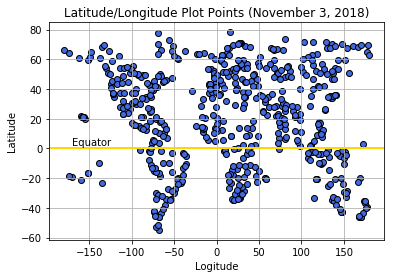

In [37]:
# Obtain the x and y coordinates for Latitudes and Longitudes to ensure global coverage
xvals = cities_data["Longitude"]
yvals = cities_data["Latitude"]

# Build the scatter plots for Latitudes/Longitudes
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolors="black", alpha = 1)

# Incorporate the other graph properties
plt.title("Latitude/Longitude Plot Points (November 3, 2018)")
plt.xlabel("Logitude")
plt.ylabel("Latitude")
plt.grid()
plt.axhline(y=0, linewidth=2, color = 'gold')
plt.text(-170,2,'Equator',rotation=0)

# Save Image
plt.savefig("Latitude_Longitude_Plot_Points")

####  Latitude vs. Temperature Plot

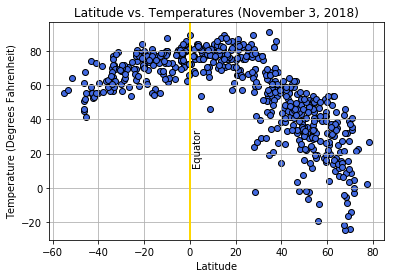

<Figure size 432x288 with 0 Axes>

In [16]:
# Obtain the x and y coordinates for Latitude and Temperature
xvals = cities_data['Latitude']
yvals = cities_data['Temperature']

# Build the scatter plots for Latitude and Temperature
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperatures (November 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Degrees Fahrenheit)")
plt.grid()
plt.axvline(x=0, linewidth=2, color='gold')
plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Latitude_and_Temperature")

#### Latitude vs. Humidity Plot

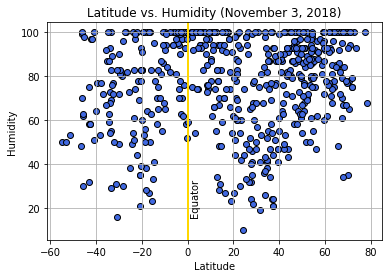

<Figure size 432x288 with 0 Axes>

In [17]:
# Obtain the x and y coordinates for Latitude and Humidity
xvals = cities_data['Latitude']
yvals = cities_data['Humidity']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (November 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.axvline(x=0, linewidth=2, color='gold')
plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Latitude_and_Humidity")

#### Latitude vs. Cloudiness Plot

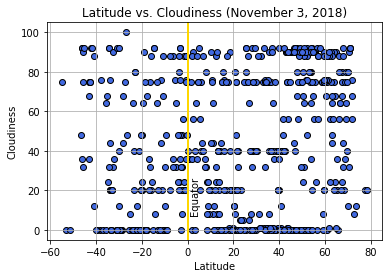

<Figure size 432x288 with 0 Axes>

In [27]:
# Obtain the x and y coordinates for Latitude and Cloudiness
xvals = cities_data['Latitude']
yvals = cities_data['Cloudiness']

# Build the scatter plots for Latitude and Cloudiness
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

#Color Scheme
#color_scheme = {'MidnightBlue':'#191970'}

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (November 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.axvline(x=0, linewidth=2, color='gold')
plt.text(1,23,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Latitude_and_Cloudiness")

#### Latitude vs. Windspeed Plot

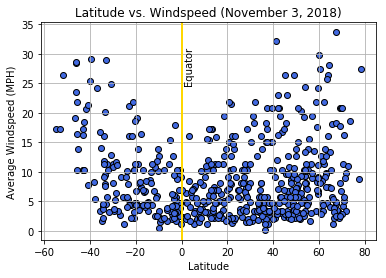

In [35]:
# Obtain the x and y coordinates for Latitude and Windspeed
xvals = cities_data['Latitude']
yvals = cities_data['Windspeed']

# Build the scatter plots for each city types
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Latitude vs. Windspeed (November 3, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Average Windspeed (MPH)")
plt.grid()
plt.axvline(x=0, linewidth=2, color='gold')
plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Latitude_and_Windspeed")

#### Cloudiness vs. Humidity Plot

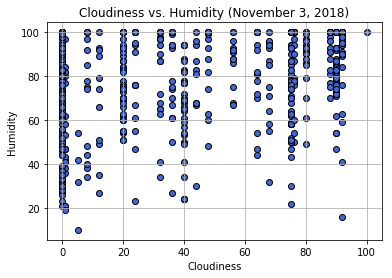

In [34]:
# Obtain the x and y coordinates for Cloudiness and Humidity
xvals = cities_data['Cloudiness']
yvals = cities_data['Humidity']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Humidity (November 3, 2018)")
plt.xlabel("Cloudiness")
plt.ylabel("Humidity")
plt.grid()
# plt.axvline(x=0, linewidth=2, color='gold')
# plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Cloudiness_and_Humidity")

#### Cloudiness vs. Wind Speed Plot

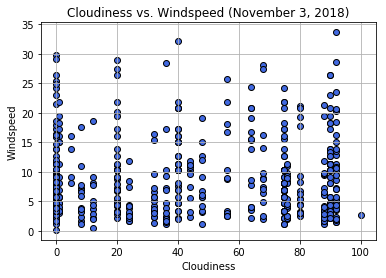

In [33]:
# Obtain the x and y coordinates for Cloudiness and Windspeed
xvals = cities_data['Cloudiness']
yvals = cities_data['Windspeed']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Windspeed (November 3, 2018)")
plt.xlabel("Cloudiness")
plt.ylabel("Windspeed")
plt.grid()
# plt.axvline(x=0, linewidth=2, color='gold')
# plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Cloudiness_and_Windspeed")

#### Cloudiness vs. Temperature Plot

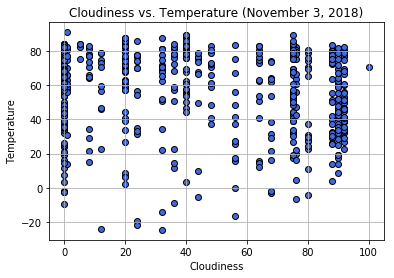

In [32]:
# Obtain the x and y coordinates for Cloudiness and Temperature
xvals = cities_data['Cloudiness']
yvals = cities_data['Temperature']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Temperature (November 3, 2018)")
plt.xlabel("Cloudiness")
plt.ylabel("Temperature")
plt.grid()
# plt.axvline(x=0, linewidth=2, color='gold')
# plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Cloudiness_and_Temperature")

#### Humidity vs. Temperature Plot

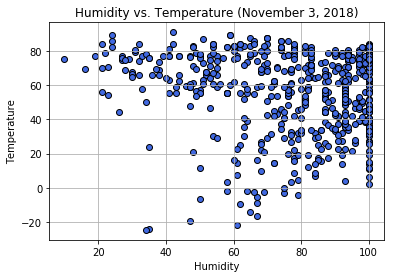

In [31]:
# Obtain the x and y coordinates for Humidity and Temperature
xvals = cities_data['Humidity']
yvals = cities_data['Temperature']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Humidity vs. Temperature (November 3, 2018)")
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.grid()
# plt.axvline(x=0, linewidth=2, color='gold')
# plt.text(1,30,'Equator',rotation=90)

#plt.show()

# Save Image
plt.savefig("Humidity_and_Temperature")

#### Wind Speed vs. Temperature Plot

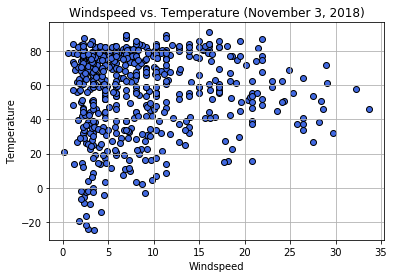

In [30]:
# Obtain the x and y coordinates for Windspeed and Temperature
xvals = cities_data['Windspeed']
yvals = cities_data['Temperature']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Windspeed vs. Temperature (November 3, 2018)")
plt.xlabel("Windspeed")
plt.ylabel("Temperature")
plt.grid()
# plt.axvline(x=0, linewidth=2, color='gold')
# plt.text(1,30,'Equator',rotation=90)

# Save Image
plt.savefig("Windspeed_and_Temperature")

#plt.show()


#### Wind Speed vs. Humidity Plot

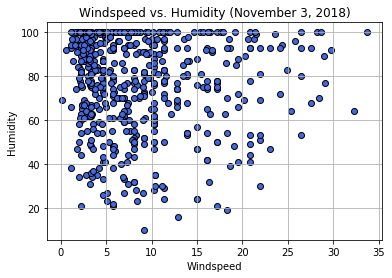

In [29]:
# Obtain the x and y coordinates for Windspeed and Humidity
xvals = cities_data['Windspeed']
yvals = cities_data['Humidity']

# Build the scatter plots for Latitude and Humidity
plt.scatter(xvals, yvals, marker="o", color = '#4169e1', edgecolor = 'black', alpha = 1)

# Incorporate the other graph properties
plt.title("Windspeed vs. Humidity (November 3, 2018)")
plt.xlabel("Windspeed")
plt.ylabel("Humidity")
plt.grid()
# plt.axvline(x=0, linewidth=2, color='gold')
# plt.text(1,30,'Equator',rotation=90)

# Save Image
plt.savefig("Windspeed_and_Humidity")

#plt.show()

